In [1]:
import wandb
import pandas as pd
import pathlib
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

font = { 'family' : 'normal', 'size'   : 14}

matplotlib.rc('font', **font)

# set title size to 14
matplotlib.rcParams['axes.titlesize'] = 14
# set y label size to 14
matplotlib.rcParams['axes.labelsize'] = 14

data_dir = pathlib.Path("./results/lowercase")

train_data = pd.read_csv(data_dir / "train_accuracy.csv")
val_data = pd.read_csv(data_dir / "val_accuracy.csv")

# drop column calld Step
#train_data = train_data.drop(columns=["Step"])
#val_data = val_data.drop(columns=["Step"])

# remove "Name: "
train_data.columns = [ c.replace("Name: ", "") for c in train_data.columns ]
val_data.columns = [ c.replace("Name: ", "") for c in val_data.columns ]

# replace accuracy__MIN with "min" and accuracy__MAX with "max"
train_data.columns = [ c.replace("accuracy__MIN", "min") for c in train_data.columns ]
train_data.columns = [ c.replace("accuracy__MAX", "max") for c in train_data.columns ]
val_data.columns = [ c.replace("val_accuracy__MAX", "max") for c in val_data.columns ]
val_data.columns = [ c.replace("val_accuracy__MIN", "min") for c in val_data.columns ]
val_data.columns = [ c.replace("val_accuracy", "accuracy") for c in val_data.columns ]

train_data.head()

,Step,architecture-4 - accuracy,architecture-4 - min,architecture-4 - max,architecture-1 - accuracy,architecture-1 - min,architecture-1 - max,architecture-2 - accuracy,architecture-2 - min,architecture-2 - max,...,architecture-5 - max,architecture-baseline - accuracy,architecture-baseline - min,architecture-baseline - max,architecture-7 - accuracy,architecture-7 - min,architecture-7 - max,architecture-6 - accuracy,architecture-6 - min,architecture-6 - max
0,0,0.844311,0.840779,0.849237,0.867655,0.864408,0.870158,0.878003,0.876354,0.880187,...,0.850522,0.835871,0.831200,0.844136,0.742408,0.713522,0.761973,0.859819,0.857917,0.861360
1,1,0.919242,0.916574,0.922329,0.924359,0.923483,0.925427,0.928497,0.927525,0.929501,...,0.903893,0.903732,0.900586,0.907386,0.846279,0.838272,0.851549,0.906483,0.905087,0.907781
2,2,0.946383,0.943963,0.948433,0.943206,0.942078,0.945126,0.943867,0.942687,0.945176,...,0.914535,0.914407,0.912205,0.917705,0.863974,0.857917,0.867801,0.917449,0.916020,0.918259
3,3,0.962112,0.960647,0.964308,0.956363,0.955160,0.958753,0.955599,0.954519,0.956750,...,0.920667,0.920155,0.917987,0.923001,0.872842,0.869050,0.875663,0.923787,0.922193,0.924596
4,4,0.971974,0.970771,0.973497,0.965294,0.963422,0.966779,0.963850,0.962981,0.965134,...,0.925604,0.924026,0.921866,0.927194,0.878605,0.875945,0.880723,0.928164,0.926753,0.928993


In [2]:
models = ["architecture-1", "architecture-2", "architecture-4", "architecture-5", "architecture-6", "architecture-7", "architecture-baseline"]
model_labels = ["Architecture A", "Architecture B", "Architecture C", "Architecture D", "Architecture E", "Architecture F", "Baseline architecture"]

Text(0.5, 0.98, 'Accuracy on all characters test set')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


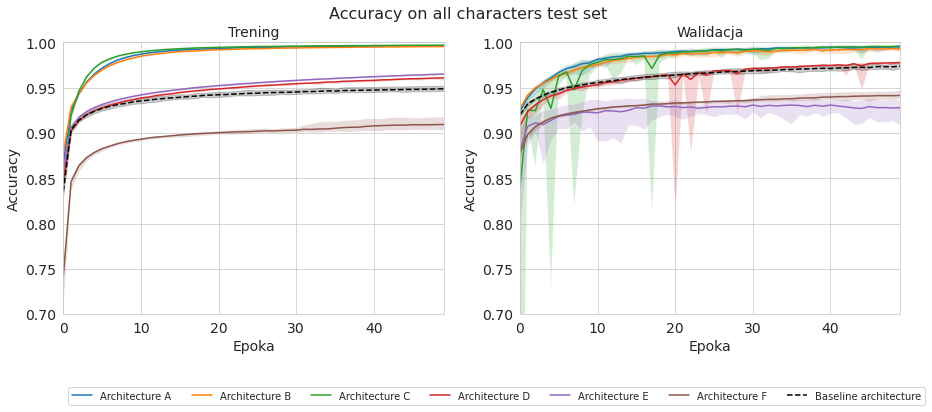

In [3]:
# plot the train and validation results
fig, ax = plt.subplots(1, 2, figsize=(15, 5))


# plot the train results
for model, label in zip(models, model_labels):
    median_acc = train_data[f"{model} - accuracy"]
    min_acc = train_data[f"{model} - min"]
    max_acc = train_data[f"{model} - max"]

    if label == "Baseline architecture":
        ax[0].plot(median_acc, label=label, linestyle="--", color="black")
        ax[0].fill_between(range(len(median_acc)), min_acc, max_acc, alpha=0.2, color="black")
        continue

    ax[0].plot(median_acc, label=label)
    ax[0].fill_between(range(len(median_acc)), min_acc, max_acc, alpha=0.2)

ax[0].set_title("Trening")
ax[0].set_xlabel("Epoka")
ax[0].set_ylabel("Accuracy")

# plot the validation results
for model, label in zip(models, model_labels):
    median_acc = val_data[f"{model} - accuracy"]
    min_acc = val_data[f"{model} - min"]
    max_acc = val_data[f"{model} - max"]

    if label == "Baseline architecture":
        ax[1].plot(median_acc, label=label, linestyle="--", color="black")
        ax[1].fill_between(range(len(median_acc)), min_acc, max_acc, alpha=0.2, color="black")
        continue

    ax[1].plot(median_acc, label=label)
    ax[1].fill_between(range(len(median_acc)), min_acc, max_acc, alpha=0.2)

ax[1].set_title("Walidacja")
ax[1].set_xlabel("Epoka")
ax[1].set_ylabel("Accuracy")

# set y axis to 0.7-1.0
ax[0].set_ylim(0.7, 1.0)
ax[1].set_ylim(0.7, 1.0)

# set x axis to 0-50
ax[0].set_xlim(0, 49)
ax[1].set_xlim(0, 49)

# display legend under the plot
ax[1].legend(loc='center left', fancybox=True, ncol=len(model_labels), bbox_to_anchor=(-1.2, -0.3))

fig.suptitle("Accuracy on all characters test set", fontsize=16)

In [4]:
model_flops = pd.read_csv(data_dir / "model_flops.csv")
num_parameters = pd.read_csv(data_dir / "num_parameters.csv")
compressed_disk_size = pd.read_csv(data_dir / "compressed_disk_size.csv")

for data in [model_flops, num_parameters, compressed_disk_size]:
    data.columns = [ c.replace("Name: ", "") for c in data.columns ]
    # remove Step column
    #data = data.drop(columns=["Step"])
# remove step column
model_flops = model_flops.drop(columns=["Step"])
num_parameters = num_parameters.drop(columns=["Step"])
compressed_disk_size = compressed_disk_size.drop(columns=["Step"])

# remove columns wth "MIN" and "MAX" in the name
model_flops = model_flops[[c for c in model_flops.columns if "MIN" not in c and "MAX" not in c]]
num_parameters = num_parameters[[c for c in num_parameters.columns if "MIN" not in c and "MAX" not in c]]
compressed_disk_size = compressed_disk_size[[c for c in compressed_disk_size.columns if "MIN" not in c and "MAX" not in c]]

# transpose the dataframes
model_flops = model_flops.T
num_parameters = num_parameters.T
compressed_disk_size = compressed_disk_size.T

# split into 
model_flops

summary_df = pd.DataFrame(columns=["model", "gflops", "num_parameters", "compressed_disk_size"])

for model, label in zip(models, model_labels):
    summary_df = summary_df.append({
        "model": label,
        "gflops": model_flops.loc[f"{model} - model_flops"][0],
        "num_parameters": num_parameters.loc[f"{model} - num_parameters"][0],
        "compressed_disk_size": compressed_disk_size.loc[f"{model} - compressed_disk_size"][0]
    }, ignore_index=True)

summary_df

,model,gflops,num_parameters,compressed_disk_size
0,Architecture A,0.017216,13824419,5.182467e+07
1,Architecture B,0.005699,1765283,6.629851e+06
2,Architecture C,0.021183,6452387,2.395657e+07
3,Architecture D,0.003976,446675,1.671299e+06
4,Architecture E,0.001640,44675,1.700386e+05
5,Architecture F,0.001298,98083,3.687568e+05
6,Baseline architecture,0.014294,483843,1.815364e+06


In [5]:
summary_df["milions of flops"] = summary_df["gflops"].map(lambda x: x * 1000)
summary_df["milions of parameters"] = summary_df["num_parameters"].map(lambda x: x / 1000000)
summary_df["compressed disk size (MB)"] = summary_df["compressed_disk_size"].map(lambda x: x / 1000000)

summary_df

,model,gflops,num_parameters,compressed_disk_size,milions of flops,milions of parameters,compressed disk size (MB)
0,Architecture A,0.017216,13824419,5.182467e+07,17.215817,13.824419,51.824668
1,Architecture B,0.005699,1765283,6.629851e+06,5.699049,1.765283,6.629851
2,Architecture C,0.021183,6452387,2.395657e+07,21.182737,6.452387,23.956565
3,Architecture D,0.003976,446675,1.671299e+06,3.976434,0.446675,1.671299
4,Architecture E,0.001640,44675,1.700386e+05,1.639761,0.044675,0.170039
5,Architecture F,0.001298,98083,3.687568e+05,1.298425,0.098083,0.368757
6,Baseline architecture,0.014294,483843,1.815364e+06,14.294441,0.483843,1.815365


In [6]:
final_summary = summary_df[["model", "milions of flops", "milions of parameters", "compressed disk size (MB)"]]

# sort like this: Baseline, A, B, C, D, E, F

'''
final_summary = final_summary.sort_values(by=["model"], key=lambda x: x.map({
    "Baseline architecture": 0,
    "Architektura A": 1,
    "Architektura B": 2,
    "Architektura C": 3,
    "Architektura D": 4,
    "Architektura E": 5,
    "Architektura F": 6
}))
'''

final_summary = final_summary.sort_values(by=["model"], key=lambda x: x.map({
    "Baseline architecture": 0,
    "Architecture A": 1,
    "Architecture B": 2,
    "Architecture C": 3,
    "Architecture D": 4,
    "Architecture E": 5,
    "Architecture F": 6
}))

#final_summary.columns = ["Model", "Millions operacji FLOPS", "Millions parametrów", "Rozmiar na dysku (MB)"]

final_summary

,model,milions of flops,milions of parameters,compressed disk size (MB)
6,Baseline architecture,14.294441,0.483843,1.815365
0,Architecture A,17.215817,13.824419,51.824668
1,Architecture B,5.699049,1.765283,6.629851
2,Architecture C,21.182737,6.452387,23.956565
3,Architecture D,3.976434,0.446675,1.671299
4,Architecture E,1.639761,0.044675,0.170039
5,Architecture F,1.298425,0.098083,0.368757


In [7]:
# generate latex table with 3 decimal places

print(final_summary.to_latex(index=False, float_format="%.3f", col_space=20))

\begin{tabular}{lrrr}
\toprule
                model &     milions of flops &  milions of parameters &  compressed disk size (MB) \\
\midrule
Baseline architecture &               14.294 &                  0.484 &                      1.815 \\
       Architecture A &               17.216 &                 13.824 &                     51.825 \\
       Architecture B &                5.699 &                  1.765 &                      6.630 \\
       Architecture C &               21.183 &                  6.452 &                     23.957 \\
       Architecture D &                3.976 &                  0.447 &                      1.671 \\
       Architecture E &                1.640 &                  0.045 &                      0.170 \\
       Architecture F &                1.298 &                  0.098 &                      0.369 \\
\bottomrule
\end{tabular}



# Other charts

In [8]:
results_all = pd.read_excel(data_dir.parent / "Praca magisterska - wyniki.xlsx", sheet_name="Wszystkie litery")

results_all.columns = [
    "Baseline architecture",
    "Architecture A",
    "Architecture B",
    "Architecture C",
    "Architecture D",
    "Architecture E",
    "Architecture F",
]

print(results_all.to_latex(index=False, float_format="%.3f"))

results_all

\begin{tabular}{rrrrrrr}
\toprule
 Baseline architecture &  Architecture A &  Architecture B &  Architecture C &  Architecture D &  Architecture E &  Architecture F \\
\midrule
                 0.861 &           0.959 &           0.961 &           0.950 &           0.875 &           0.839 &           0.815 \\
                 0.858 &           0.977 &           0.957 &           0.957 &           0.875 &           0.837 &           0.828 \\
                 0.859 &           0.973 &           0.955 &           0.934 &           0.878 &           0.833 &           0.828 \\
                 0.861 &           0.971 &           0.953 &           0.955 &           0.876 &           0.838 &           0.826 \\
                 0.860 &           0.972 &           0.951 &           0.958 &           0.874 &           0.837 &           0.828 \\
                 0.860 &           0.969 &           0.950 &           0.930 &           0.877 &           0.827 &           0.825 \\
                 0.

,Baseline architecture,Architecture A,Architecture B,Architecture C,Architecture D,Architecture E,Architecture F
0,0.8608,0.9586,0.9609,0.9503,0.8749,0.8385,0.8154
1,0.8578,0.9768,0.9572,0.9573,0.8754,0.8372,0.8281
2,0.8591,0.9730,0.9550,0.9337,0.8783,0.8325,0.8278
3,0.8605,0.9705,0.9526,0.9552,0.8764,0.8381,0.8263
4,0.8595,0.9716,0.9505,0.9579,0.8744,0.8372,0.8281
5,0.8603,0.9693,0.9504,0.9305,0.8767,0.8273,0.8245
6,0.8589,0.9705,0.9501,0.9579,0.8888,0.8339,0.8272
7,0.8586,0.9773,0.9501,0.9573,0.8875,0.8372,0.8146
8,0.8583,0.9762,0.9497,0.9582,0.8889,0.8399,0.8281
9,0.8578,0.9754,0.9489,0.9572,0.8872,0.8387,0.8287


In [9]:
# for each results_all column show median and std deviation
statistics = []

for col in results_all.columns:
    statistics.append({
        "model": col,
        "median": results_all[col].median(),
        "std": results_all[col].std()
    })

statistics_df = pd.DataFrame(statistics)
statistics_df.columns = ["Model", "Mediana", "Std"]
# transpose
statistics_df = statistics_df.T
# format floats
statistics_df = statistics_df.applymap(lambda x: f"{x:.3f}" if isinstance(x, float) else x)
print(statistics_df.to_latex())

\begin{tabular}{llllllll}
\toprule
{} &                      0 &               1 &               2 &               3 &               4 &               5 &               6 \\
\midrule
Model   &  Baseline architecture &  Architecture A &  Architecture B &  Architecture C &  Architecture D &  Architecture E &  Architecture F \\
Mediana &                  0.858 &           0.972 &           0.949 &           0.950 &           0.877 &           0.837 &           0.826 \\
Std     &                  0.002 &           0.004 &           0.006 &           0.010 &           0.007 &           0.003 &           0.006 \\
\bottomrule
\end{tabular}



In [10]:
formatted_final_summary = final_summary.copy()

formatted_final_summary["milions of flops"] = formatted_final_summary["milions of flops"].map(lambda x: f"{x:.2f}")
formatted_final_summary["milions of parameters"] = formatted_final_summary["milions of parameters"].map(lambda x: f"{x:.2f}")
formatted_final_summary["compressed disk size (MB)"] = formatted_final_summary["compressed disk size (MB)"].map(lambda x: f"{x:.2f}")
formatted_final_summary

,model,milions of flops,milions of parameters,compressed disk size (MB)
6,Baseline architecture,14.29,0.48,1.82
0,Architecture A,17.22,13.82,51.82
1,Architecture B,5.70,1.77,6.63
2,Architecture C,21.18,6.45,23.96
3,Architecture D,3.98,0.45,1.67
4,Architecture E,1.64,0.04,0.17
5,Architecture F,1.30,0.10,0.37


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


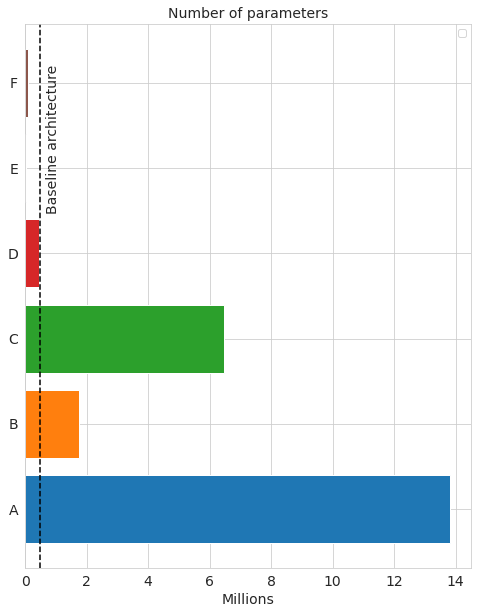

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


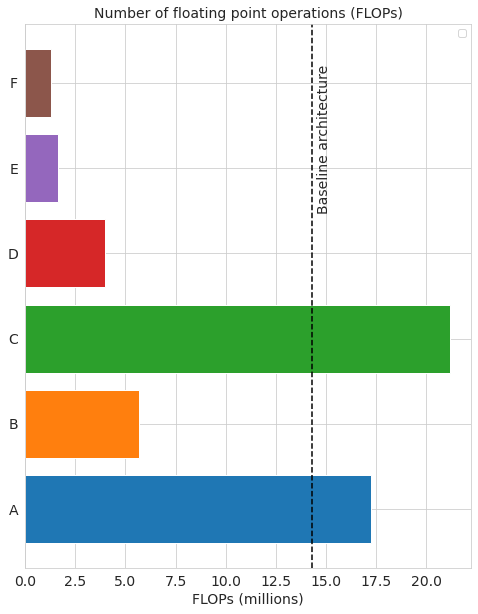

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


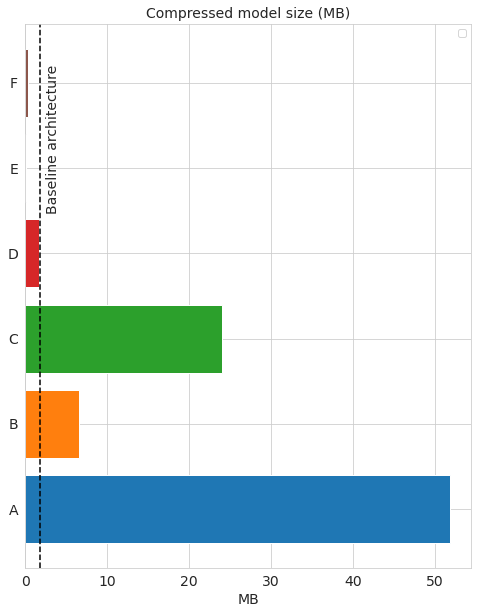

In [11]:
models_cmap = plt.get_cmap("tab10")
models_cmap_list = [models_cmap(i) for i in range(len(model_labels))] 
models_cmap_list = models_cmap_list[:-1]

final_summary['model'] = final_summary['model'].str.replace('Architecture', '').str.replace('architecture', '').str.strip()

# get Baseline values
baseline_values = final_summary[final_summary["model"] == "Baseline"].copy()

# remove Baseline from the dataframe
final_summary_no_baseline = final_summary[final_summary["model"] != "Baseline"]

# display number of parameters
fig, ax = plt.subplots(1, 1, figsize=(8, 10))

#final_summary = final_summary.sort_values(by="thousands of parameters", ascending=False)
ax.barh(final_summary_no_baseline["model"], final_summary_no_baseline["milions of parameters"], color=models_cmap_list)
# draw baseline as a black dotted line
ax.axvline(baseline_values["milions of parameters"].values, color="black", linestyle="--")
# annotate with a text that says "Baseline architecture" on the right side of the plot. Draw it sideways
ax.annotate("Baseline architecture", xy=(baseline_values["milions of parameters"].values, 0), xytext=(baseline_values["milions of parameters"].values + 0.2, 3.5), rotation=90, fontsize=14)

ax.set_title("Number of parameters")
ax.set_xlabel("Millions")

ax.legend()
# save figure with 300 dpi
plt.savefig("figures/num_parameters.png", dpi=300)
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(8, 10))

#final_summary = final_summary.sort_values(by="milions of flops", ascending=False)
ax.barh(final_summary_no_baseline["model"], final_summary_no_baseline["milions of flops"], color=models_cmap_list)
# draw baseline as a black dotted line
ax.axvline(baseline_values["milions of flops"].values, color="black", linestyle="--")
# annotate with a text that says "Baseline architecture" on the right side of the plot. Draw it sideways
ax.annotate("Baseline architecture", xy=(baseline_values["milions of flops"].values, 0), xytext=(baseline_values["milions of flops"].values + 0.25, 3.5), rotation=90, fontsize=14)
ax.set_title("Number of floating point operations (FLOPs)")
ax.set_xlabel("FLOPs (millions)")

ax.legend()
# save figure with 300 dpi
plt.savefig("figures/num_flops.png", dpi=300)
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(8, 10))

ax.barh(final_summary_no_baseline["model"], final_summary_no_baseline["compressed disk size (MB)"], color=models_cmap_list)
# draw baseline as a black dotted line
ax.axvline(baseline_values["compressed disk size (MB)"].values, color="black", linestyle="--")
# annotate with a text font size 15 that says "Baseline architecture" on the right side of the plot. Draw it sideways

ax.annotate(
    "Baseline architecture", 
    xy=(baseline_values["compressed disk size (MB)"].values, 0), 
    xytext=(baseline_values["compressed disk size (MB)"].values + 0.75, 3.5), 
    rotation=90,
    fontsize=14
)
ax.set_title("Compressed model size (MB)")
ax.set_xlabel("MB")

ax.legend()
# save figure with 300 dpi
plt.savefig("figures/compressed_size.png", dpi=300)
plt.show()

In [12]:
final_summary

,model,milions of flops,milions of parameters,compressed disk size (MB)
6,Baseline,14.294441,0.483843,1.815365
0,A,17.215817,13.824419,51.824668
1,B,5.699049,1.765283,6.629851
2,C,21.182737,6.452387,23.956565
3,D,3.976434,0.446675,1.671299
4,E,1.639761,0.044675,0.170039
5,F,1.298425,0.098083,0.368757


In [13]:
# change results_all column names to match final_summary
results_all.columns = final_summary["model"].values

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


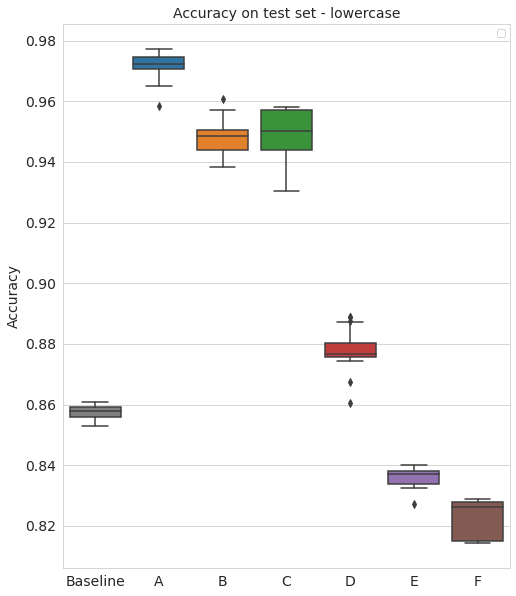

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8, 10))

#ax.boxplot(results_all.values)
# copy models_cmap_list and add gray color to the beginning
boxplot_cmap = models_cmap_list.copy()
boxplot_cmap.insert(0, "gray")
sns.boxplot(data=results_all, ax=ax, palette=boxplot_cmap)
ax.set_xticklabels(results_all.columns)
ax.set_title("Accuracy on test set - lowercase")
ax.set_ylabel("Accuracy")

# show legend
ax.legend()
# save figure with 300 dpi
plt.savefig("figures/accuracy_lowercase.png", dpi=300)
plt.show()

c:\Users\Wiktor\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)


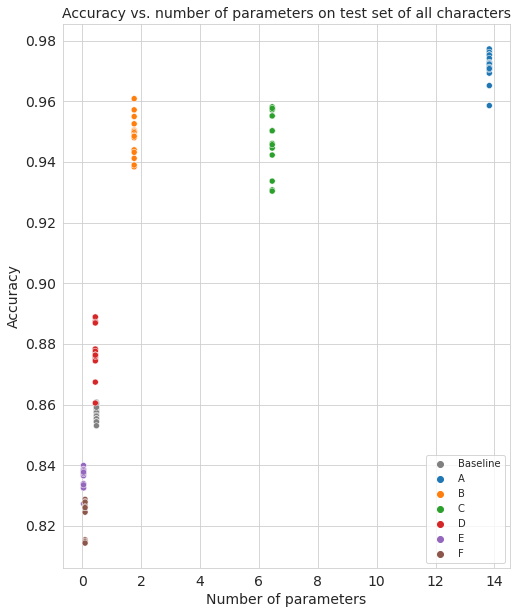

In [15]:
# based on results_all and final_summary, plot scatterplot accuracy vs. number of parameters where x axis is number of parameters and y axis is accuracy and each dot is an observation from results_all
# and each dot is colored based on the model it belongs to

# create a new dataframe with columns: model, accuracy, num_parameters
num_param_acc = pd.DataFrame(columns=["model", "accuracy", "num_parameters"])

for model in results_all.columns:
    # get accuracy values for the model
    acc = results_all[model]
    # get number of parameters for the model
    num_params = final_summary[final_summary["model"] == model]["milions of parameters"].values[0]
    # create a new dataframe with columns: model, accuracy, num_parameters
    model_num_param_acc = pd.DataFrame(columns=["model", "accuracy", "num_parameters"])
    model_num_param_acc["model"] = [model] * len(acc)
    model_num_param_acc["accuracy"] = acc
    model_num_param_acc["num_parameters"] = num_params
    # append the dataframe to the main dataframe
    num_param_acc = num_param_acc.append(model_num_param_acc)

# plot the scatterplot

fig, ax = plt.subplots(figsize=(8, 10))

# plot the scatterplot
sns.scatterplot(data=num_param_acc, x="num_parameters", y="accuracy", hue="model", ax=ax, palette=boxplot_cmap)

# show legend

# set title
ax.set_title("Accuracy vs. number of parameters on test set of all characters")



# plot reggression line as thin black dashed line with label "Regresja liniowa"
#sns.regplot(data=num_param_acc, x="num_parameters", y="accuracy", ax=ax, color="black", scatter=False, line_kws={"linestyle":"--", "linewidth":1}, ci=None, label="Regresja liniowa")
ax.set_xlabel("Number of parameters")
ax.set_ylabel("Accuracy")
ax.legend(loc="lower right")

# save figure with 300 dpi
plt.savefig("figures/accuracy_vs_num_parameters.png", dpi=300)
plt.show()